# ♈ Course Project II: AI for Network Optimization

# **姓名：（可组队完成，每队最多3人）**

# **学号：**

### **汇报时间：2025.12.30（暂定），（1）每队讲解PPT并演示代码；（2）各队对比训练时间和性能。**

This notebook is the course project for the course "Optimization Theory and Algorithms" in SLAI (Instructor: Lin Gao)

# 📉 问题和任务描述

**（1）网络场景**

M=100个小区，分布于2000米*2000米的矩形区域，每个小区m的带宽记为B[m]；

N=600个用户，分布于同一个矩形区域，每个用户n的平均数据流量记为A[n]；

计算每个用户到每个小区的距离，记为距离矩阵Dist[M, N]；

根据距离矩阵Dist，计算RSRP（接收参考信号强度）矩阵Rsrp[M, N]，其中用户n到小区m的信号强度Rsrp_mn 的计算公式为：Rsrp_mn =  -65 - 37.6 * log10(Dist_mn / 50) dBm （典型城区环境，路径衰减系数3.76）；

根据RSRP矩阵，计算信道容量矩阵Capa[M, N]，其中用户n到小区m的单位带宽信道容量记为 Capa_mn = log(1 + Rsrp_mn / Noise_Int)，其中Noise_Int = -100为噪声和干扰功率（假设近似不变）；

定义小区-用户关联矩阵Conn[M, N]：如果用户n和小区m的距离小于阈值D_th（例如500米）或连接概率低于阈值P_th，则Conn_mn = 1，表示用户n可以接入小区m；否则Conn_mn = 0，表示用户n无法接入小区m；

根据关联矩阵Conn，计算小区邻接关系矩阵NeighCell[M, M]：如果小区m和小区k拥有至少一个相同的关联用户，则NeighCell_mk = NeighCell_km=1，否则NeighCell_mn=0。该矩阵用于算法加速。

**（2）用户流量分配概率**

根据RSRP矩阵，计算每个用户到每个小区的流量分配概率矩阵Prob[M, N]，其中用户n到小区m的流量分配概率为 Prob_mn = exp(Rsrp_mn*beta)Conn_mn / sum_k exp(Rsrp_mn*beta)*Conn_kn （经典softmax函数），其中beta为概率分散度调控因子；

**（3）小区负载计算**

根据每个用户的平均到达数据量A[N] 以及 流量分配概率矩阵Prob[M, N]，计算每个用户流入每个小区的数据流量矩阵Lambda[M, N]，其中用户n流入小区m的流量记为Lambda_mn = A_n * Prob_mn；

计算每个小区m收到的总流量Traffic_m = sum_n Lambda_mn；消耗的总带宽资源为L_m = sum_n Lambda_mn / Capa_mn；带宽资源利用率为 l_m = L_m / B[m]；

根据带宽利用率和总带宽资源消耗量，计算每个小区m的成本函数：
Cost_m = L_m * exp (alpha * (l_m - 0.8))，其中第一项为总带宽消耗量，第二项为单位成本函数。

**（4）关键问题：**

如何引导用户流量流入低负载和低成本小区，使系统总成本最小化。

## 🧭 **问题：为什么要“引导”用户接入不同小区？**

在 LTE / NR 网络中，每个终端用户（UE）根据下行接收功率（RSRP）或信号质量（RSRQ/SINR）等指标来选择/切换小区。

👉 但如果仅仅根据信号强度选择，就会出现这种情况：

小区 B 信号稍好 → 大量用户集中接入 B；

相邻小区 A 信号略弱 → 却很空闲。

于是出现“一个小区拥塞，另一个小区空闲”的典型负载不均衡问题。


## ⚙️ **思路：参数引导（Cell Reselection / Handover Biasing）**

通过调整特定参数（通常称为 “小区优先级偏置” 或 cell‑individual‑offset / CIO 等），实现用户接入的优先级的调节。

具体如下：每个小区m设置一个初始的小区独立偏置因子（cell‑individual‑offset，CIO），记为 X_m；然后，根据CIO计算偏置RSRP矩阵 offset_Rsrp[m,n]，其中 offset_Rsrp_mn = Rsrp_mn + X_m；根据offset_RSRP矩阵，重新计算每个用户到每个小区的流量分配概率矩阵Prob[M, N]，以及小区负载、系统成本等。


# ♻ **任务目标：优化小区CIO，实现负载均衡和成本优化**


**优化变量：每个小区的CIO，即 [x1, x2, ... , xm]**

**目标：最小化所有小区的QoS Degradation 和 Energy Cost总和**



## ✅ 基础任务：传统优化算法

**任务描述：设计经典优化算法求解**

要求：优化算法收敛，且目标值（成本）下降到一个合理程度

算法思路：通过Forward和Backward过程计算梯度；通过梯度下降/动量/自适应/Adam等算法更新策略。



## ✅ 扩展任务：AI for Network Optimization

**自行挑选一个合适的AI框架（包括但不限于：强化学习、深度学习、扩散模型、大语言模型、图神经网络等），求解上述网络优化问题。**

以下方案供参考（也可自行选择其他方案）

### **方案1：DRL方法**

任务描述：利用强化学习/深度强化学习求解

要求：RL算法收敛，且目标值（成本）下降到一个合理程度

算法思路：设计合理的Reward函数；构建深度神经网络；通过DQN、PPO等强化学习算法更新策略。

**注意：无需构建数据集。**


### **方案2：Diffusion Model方法**

任务描述：利用生成式扩散模型求解

要求：训练扩散模型直接生成结果，且生成结果的目标值（成本）保持在较好的水准

算法思路：建立数据集；构建噪声预测神经网络；通过经典神经网络训练算法训练噪声预测网络。

数据集建议：每条数据对应一组状态向量/矩阵（特征）及对应的结果（标签），即
**{特征：Rsrp[M,N], Conn[M,N], A[N], B[M], C0[M] ...} -> {标签：X[M]}**


### **方案3：GNN方法**

任务描述：利用图神经网络求解

要求：构建图神经网络，训练神经网络生成理想的结果

算法思路：建立数据集；选择合适的图神经网络架构；

数据集建议：同上


### **方案4：其他方案（如LLM、LVM等）**

任务描述：利用大模型（如大语言模型）求解

要求：可利用预训练好的大模型生成结果，目标值（成本）保持在较好的水准

算法思路：建立数据集；挑选合适的大模型，利用数据集进行微调。

数据集建议：同上


# ▶ 仿真场景生成

In [17]:
# 仿真场景（除了seed，M，N，其他参数不要改动！！）

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.animation as animation
import sys
import os
import datetime

# 训练的时候可随机，测试的时候选定seed进行对比
random_seed = np.random.randint(0, 2**16 - 1)
np.random.seed(random_seed)

# 1. 参数设置
M = 100            # 小区数量
N = 600            # 用户数量
Area_x, Area_y = 2000, 2000 # 单位：米

# 2. 位置生成（均匀分布）
cell_pos = np.random.uniform(0, (Area_x, Area_y), (M, 2))
user_pos = np.random.uniform(0, (Area_x, Area_y), (N, 2))

# 3. 距离矩阵 Dist[M, N]
MinDist = 100
Dist = np.linalg.norm(cell_pos[:, None, :] - user_pos[None, :, :], axis=2)
Dist [Dist < MinDist] = MinDist

# 4. RSRP矩阵 Rsrp[M, N]:  -65dBm ~ -125dBm (对应50米-2000米)
#     -65 dBm (50米)
#     -76.3 dBm (100米)
#     -87.6 dBm (200米)
#     -98.9 dBm (400米)
#     -105.6 dBm (600米)
#     -110.3 dBm (800米)
#     -113.9 dBm (1000米)
#     -120.5 dBm (1500米)
#     -125.2 dBm (2000米)
G0 = -65        # 包含发射功率、天线增益、频率衰减系数等所有其他因素（距离除外）
Loss_factor = 3.76   # 城市环境距离衰减因子
Rsrp = G0 - 10 * Loss_factor * np.log10(Dist/50)


# 5. 信道容量矩阵 Capa[M, N]：
#     11.6 bit/s/Hz (50米)  --> 116 Mbit/s
#     7.87 bit/s/Hz (100米) --> 78.7 Mbit/s  （10M带宽）
#     4.19 bit/s/Hz (200米) --> 41.9 Mbit/s
#     1.18 bit/s/Hz (400米) --> 11.8 Mbit/s
#     0.35 bit/s/Hz (600米) --> 7.0 Mbit/s
#     0.13 bit/s/Hz (800米) --> 1.3 Mbit/s
#     0.057 bit/s/Hz (1000米) --> 0.57 Mbit/s
#     0.013 bit/s/Hz (1500米) --> 0.13 Mbit/s
#     0.0043 bit/s/Hz (2000米) --> 0.043 Mbit/s
I_Noise = -100   # 干扰+噪声功率：-100 dB
SINR = Rsrp - I_Noise
Capa = np.log2(1 + 10**(SINR/10))

# 6. 初始关联矩阵 Conn[M, N]
MaxDist = 500          # 接入阈值，超过此距离Conn=0
Conn = (Dist <= MaxDist).astype(int)

# 7. 初始接入概率 或 流量分配矩阵 Alloc[M, N]:
#   根据softmax进行分配：alloc_prob = exp(rsrp*beta) / sum( exp(rsrp * beta))
CIO = np.zeros(M)

rsrp_cio = Rsrp + CIO[:, np.newaxis]

rsrp_normalized = rsrp_cio - rsrp_cio.max(axis=0) # 归一化，便于softmax计算

beta = 0.2   # 流量分配权重系数: beta越大，分配越集中/不均匀（重要！！！）

exp_rsrp = np.exp(rsrp_normalized * beta) * Conn
sum_exp = exp_rsrp.sum(axis=0, keepdims=True)
sum_exp[sum_exp==0] = 1e-9
Prob = exp_rsrp / sum_exp  # allocation probability

# 8. 更新关联矩阵 和 接入概率（流量分配）
#   降低仿真复杂度：移除概率小于 prob_th 的关联链路，重新计算概率

prob_th = 0.05  # 最小接入概率阈值：prob_th 越大，分配越集中（重要！！！）

Conn [Prob<prob_th] = 0
exp_rsrp = np.exp(rsrp_normalized * beta) * Conn
sum_exp = exp_rsrp.sum(axis=0, keepdims=True)
sum_exp[sum_exp==0] = 1e-9
Prob = exp_rsrp / sum_exp

# 提取每个小区的关联用户，尝试用于加速Backward梯度计算（实测无法加速：虽然计算量减少，但是CPU随机访问被打乱，总体时间增加。重要！！！）
ConnUser = [np.where(row == 1)[0].tolist() for row in Conn]


# 9. 计算每个小区的邻接小区：只要有一个共同的关联用户，则为邻区
#   Backward计算梯度的时候，只需要考虑邻区，可加速计算，提速4-6倍（重要！！！）
NeighCell = np.zeros((M, M))

for m in range(M):
    # step 1: 抽取第 m 行
    tmp_conn_m = Conn[m, :]     # shape (N,)
    # step 2: 计算 b = Conn @ a_m.T
    tmp_b = Conn @ tmp_conn_m       # shape (M,)
    # step 3: 二值化 b -> c
    tmp_c = (tmp_b > 0).astype(int)    # shape (M,)
    tmp_c[m] = 1  # 每个小区跟自己永远都是邻接小区
    # step 4: 将 c 赋给 NeighCell 的第 m 行和第 m 列
    NeighCell[m, :] = tmp_c
    NeighCell[:, m] = tmp_c


print(f"✅ 场景参数生成，Random seed = {random_seed}")


# ▶ 仿真场景直观展示

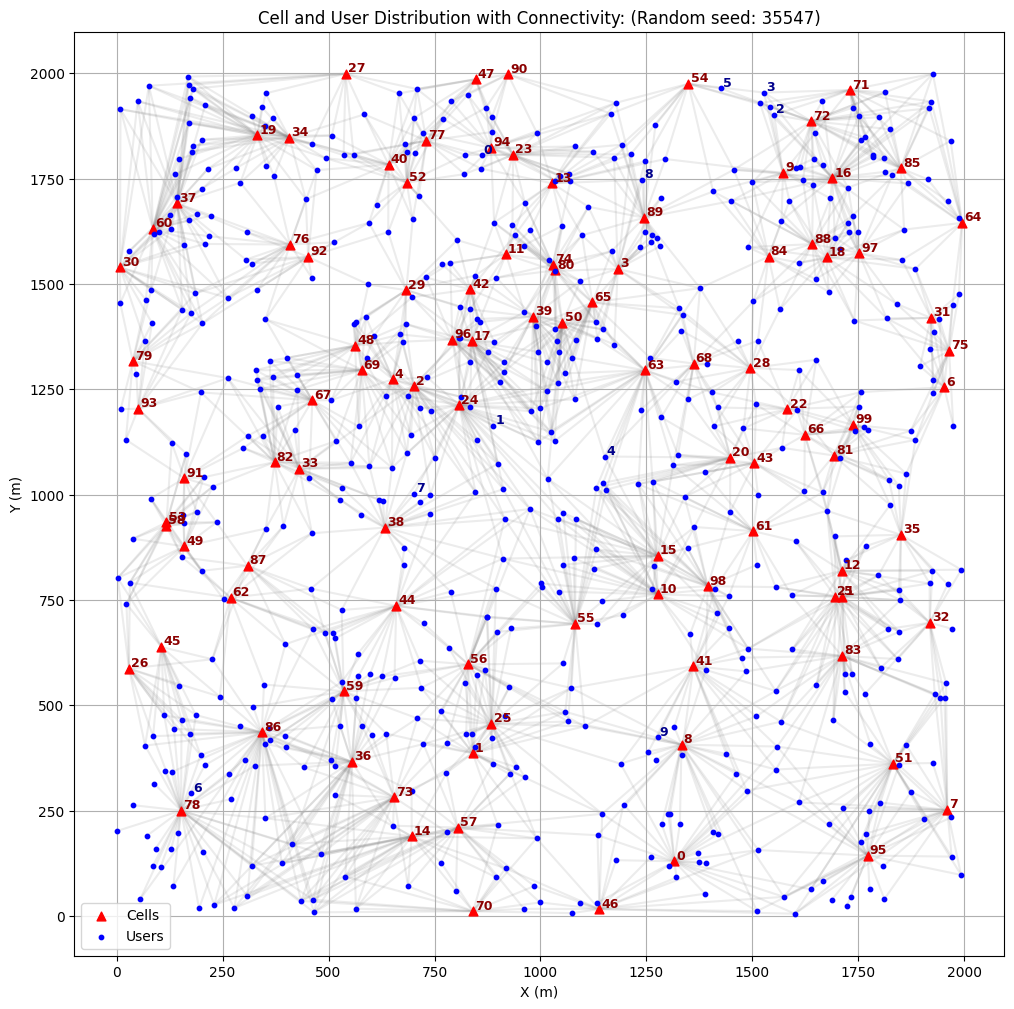

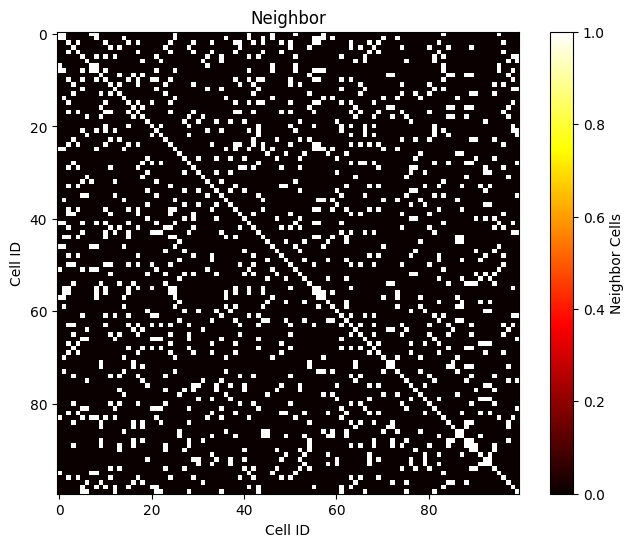

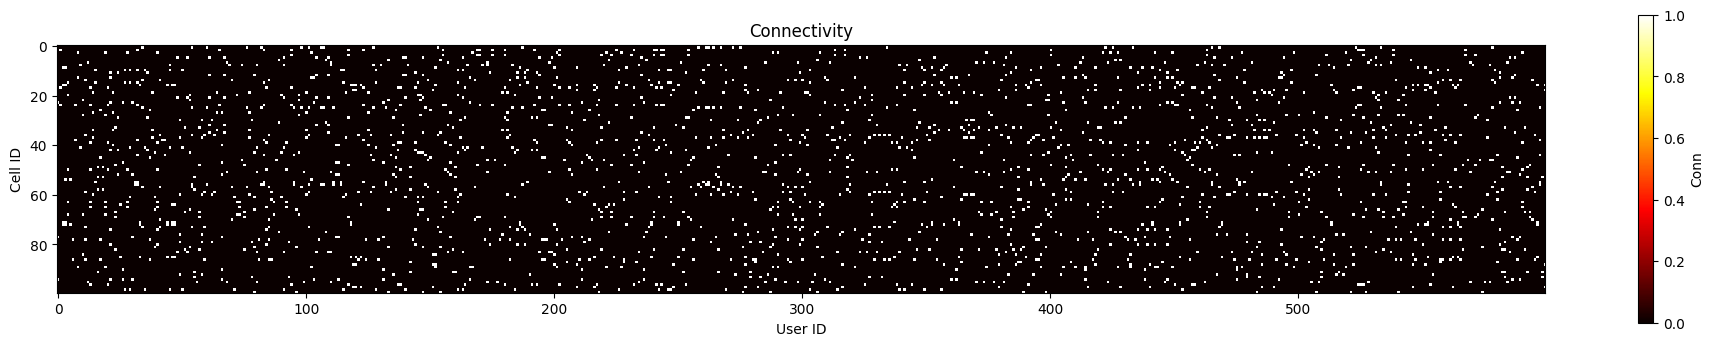

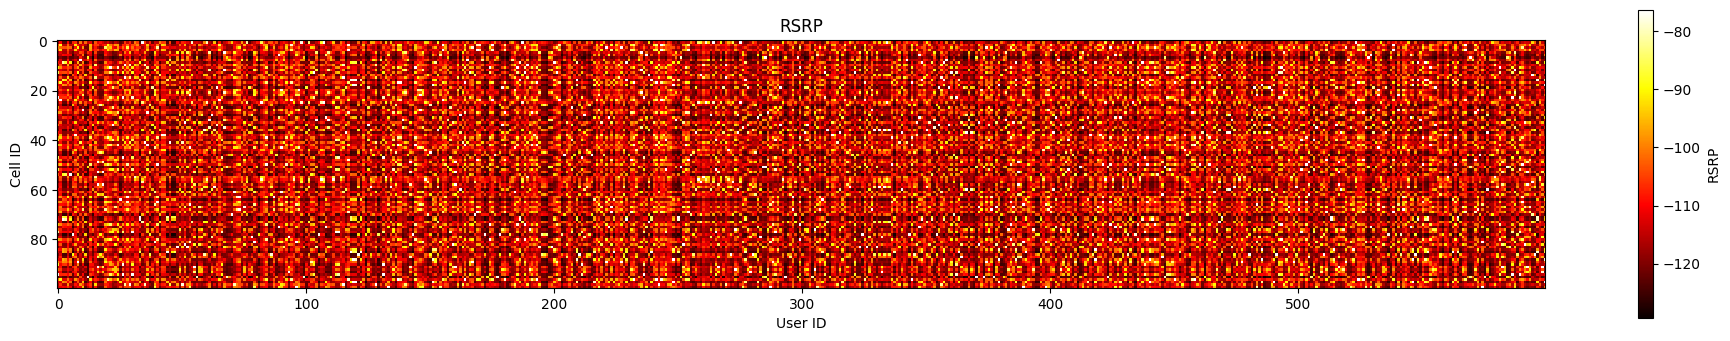

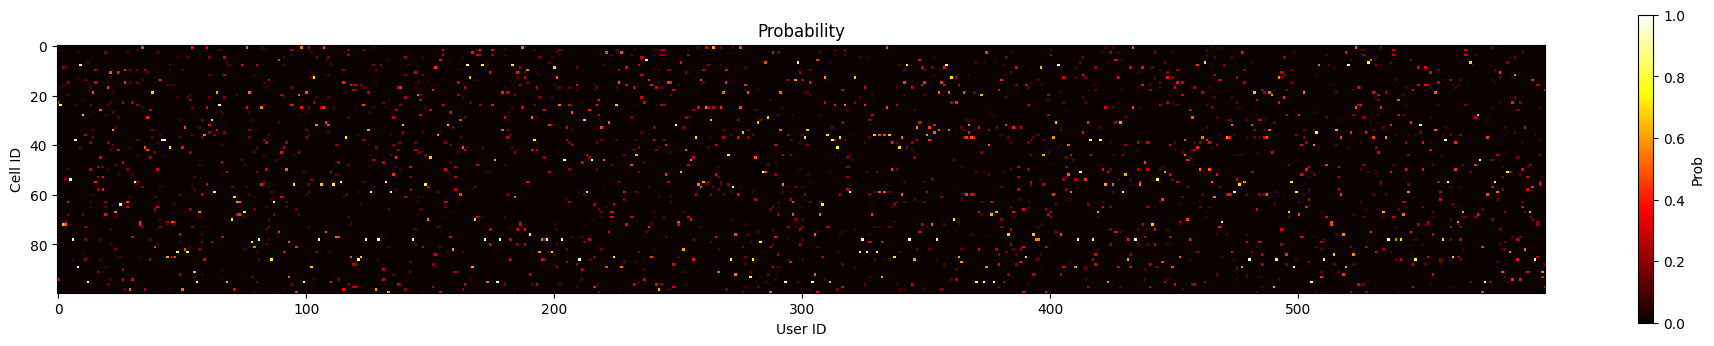

In [18]:
# 直观展示场景图（不要改动！！）


# --- (1) 小区与用户空间分布及连接关系 ---
plt.figure(figsize=(12, 12))
# 绘制连接线
for m in range(M):
    connected_users = np.where(Conn[m, :] == 1)[0]
    for n in connected_users:
        plt.plot([cell_pos[m, 0], user_pos[n, 0]],
                 [cell_pos[m, 1], user_pos[n, 1]],
                 color='gray', alpha=0.15, zorder=1)

plt.scatter(cell_pos[:, 0], cell_pos[:, 1], c='red', marker='^', s=40, label='Cells', zorder=2)
plt.scatter(user_pos[:, 0], user_pos[:, 1], c='blue', s=10, label='Users', zorder=2)

# 在小区旁边标注编号
for m in range(M):
    plt.text(cell_pos[m, 0] + 5,       # 向右偏移一点避免遮挡
             cell_pos[m, 1] + 5,       # 向上偏移一点
             f"{m}", color='darkred', fontsize=9, weight='bold')

# 在用户0-10旁边标注编号
for n in range(10):
    plt.text(user_pos[n, 0] + 5,       # 向右偏移一点避免遮挡
             user_pos[n, 1] + 5,       # 向上偏移一点
             f"{n}", color='darkblue', fontsize=9, weight='bold')

plt.title(f"Cell and User Distribution with Connectivity: (Random seed: {random_seed})")
plt.xlabel("X (m)")
plt.ylabel("Y (m)")
plt.legend()
plt.grid(True)
# plt.tight_layout()

plt.show()



# 仔细观察下面的图片，尝试寻找矩阵特点（如稀疏性、对称性），构思合适的AI算法。（重要！！）


# --- (2) NeighCell 热力图 ---

plt.figure(figsize=(8, 6))
plt.imshow(NeighCell, cmap='hot', interpolation='nearest')
plt.colorbar(label='Neighbor Cells')
plt.title('Neighbor')
plt.xlabel('Cell ID')
plt.ylabel('Cell ID')
plt.show()


# --- (2) RSRP, CONN, Prob热力图 ---


plt.figure(figsize=(24, 4))
plt.imshow(Conn, cmap='hot', interpolation='nearest')
plt.colorbar(label='Conn')
plt.title('Connectivity')
plt.xlabel('User ID')
plt.ylabel('Cell ID')
plt.show()


plt.figure(figsize=(24, 4))
plt.imshow(Rsrp, cmap='hot', interpolation='nearest')
plt.colorbar(label='RSRP')
plt.title('RSRP')
plt.xlabel('User ID')
plt.ylabel('Cell ID')
plt.show()


plt.figure(figsize=(24, 4))
plt.imshow(Prob, cmap='hot', interpolation='nearest')
plt.colorbar(label='Prob')
plt.title('Probability')
plt.xlabel('User ID')
plt.ylabel('Cell ID')
plt.show()






# ▶ 场景函数

In [19]:
# 关键变量与函数（不要改动！！）


# x_t: 决策变量，CIO
# beta: 概率分配因子，softmax参数
# Q0, Alpha, L0: QoS Degradation函数参数
# C0_all：Energy Cost函数参数，每个小区的能耗成本系数，np.random.uniform(1, 1, M)
# Wq, We：目标函数中QoS和Energy的权重
# Rsrp, Conn, Capa：预定义的RSRP矩阵，关联矩阵，容量矩阵
# ALL_Users_Traffic：向量A，每个用户的到达流量均值，np.random.uniform(xx, yy, N)
# ALL_Cells_Bw：向量B，每个小区的总带宽，np.ones(M) * 10


# 目标函数 Part I: QoS下降评估函数：QoS下降系数 * 总资源使用量
def func_Q(Load_m, ALL_Cells_Bw, Q0=0.5, L0=0.8, Alpha=20):
    return Q0 * np.exp(Alpha * (Load_m - L0)) * Load_m * ALL_Cells_Bw

# QoS下降函数针对load的梯度
def grad_Q_to_l(Load_m, ALL_Cells_Bw, Q0=0.5, L0=0.8, Alpha=20):
    QoS_Degrade = func_Q(Load_m, ALL_Cells_Bw, Q0, L0, Alpha)
    return (Alpha + 1/(Load_m + 1e-9)) * QoS_Degrade


# 目标函数 Part II: Energy成本函数：不同能源类型对应不同函数形式
def func_E(Load_m, ALL_Cells_Bw, C0_all):
    # 光伏+电网+电池，对应准Quadratic Function
    return C0_all * Load_m * ALL_Cells_Bw * Load_m * ALL_Cells_Bw

# Energy成本函数针对load的梯度
def grad_E_to_l(Load_m, ALL_Cells_Bw, C0_all):
    # 光伏+电网+电池，对应准Quadratic Function
    return 2 * C0_all * Load_m * ALL_Cells_Bw * ALL_Cells_Bw


# 流量分配概率矩阵（Softmax）
def scheduling_prob(x_t, Rsrp, Conn, beta):

    rsrp_cio = Rsrp + x_t[:, np.newaxis]
    rsrp_normalized = rsrp_cio - rsrp_cio.max(axis=0) # 归一化，便于softmax计算
    exp_rsrp = np.exp(rsrp_normalized * beta) * Conn
    # sum_exp = exp_rsrp.sum(axis=0, keepdims=True) + 1e-9  # 小概率列直接加1e-9会引入严重误差，只在零概率列（没有用户接入）加1e-9（重要！！！）
    sum_exp = exp_rsrp.sum(axis=0, keepdims=True)
    sum_exp[sum_exp==0] = 1e-9

    return exp_rsrp / sum_exp  # allocation probability [M, N]


# 估测网络总容量
def network_capa_estimate(Prob, Capa, Conn, ALL_Cells_Bw):
    cell_rows, user_cols = Prob.shape
    return np.mean(np.sum(Prob * Capa * Conn * ALL_Cells_Bw[:, np.newaxis], axis=0)) * cell_rows / user_cols



# ▶ 方案A：传统优化算法设计

目标：最小化小区的QoS下降和能源成本

决策变量：通过优化小区CIO，实现负载均衡或优化调度。





In [20]:
# 算法设计相关函数（完成以下函数，可自行添加函数、调整输入输出等）


# Forward：输入xt以及系统参数，输出结果并缓存中间结果
def forward(x_t, beta, Q0, Alpha, L0, C0_all, Wq, We, Rsrp, Conn, Capa, ALL_Users_Traffic, ALL_Cells_Bw):
    cache = {}

    # 1. RSRP + CIO
    rsrp_cio = Rsrp + x_t[:, np.newaxis]

    # 2. Softmax Probability
    rsrp_norm = rsrp_cio - rsrp_cio.max(axis=0)
    exp_rsrp = np.exp(rsrp_norm * beta) * Conn
    sum_exp = exp_rsrp.sum(axis=0, keepdims=True)
    sum_exp[sum_exp == 0] = 1e-9
    Prob = exp_rsrp / sum_exp

    # 3. Load
    # L_m_abs: Absolute bandwidth usage (Sum(A_n * Prob_mn / Capa_mn))
    L_m_abs = np.sum((ALL_Users_Traffic * Prob) / Capa, axis=1)
    # l_m_ratio: Bandwidth utilization ratio (L_m / B_m)
    l_m_ratio = L_m_abs / ALL_Cells_Bw

    # 4. Costs
    # QoS Cost (using utilization ratio)
    qos_cost_m = func_Q(l_m_ratio, ALL_Cells_Bw, Q0, L0, Alpha)
    # Energy Cost (using utilization ratio)
    energy_cost_m = func_E(l_m_ratio, ALL_Cells_Bw, C0_all)

    # Total Objective
    obj = np.sum(Wq * qos_cost_m + We * energy_cost_m)

    cache = {
        'Prob': Prob,
        'Load_m': l_m_ratio,
        'L_m_abs': L_m_abs,
        'Unit_Cost': Wq * qos_cost_m + We * energy_cost_m,
        'QoS_Cost': np.sum(Wq * qos_cost_m),
        'Energy_Cost': np.sum(We * energy_cost_m)
    }

    return obj, cache


# Backward（链式法则计算梯度）：输入xt以及系统参数，输出梯度
def backward(x_t, cache, M, N, beta, Q0, Alpha, L0, C0_all, Wq, We, Conn, Capa, ALL_Users_Traffic, ALL_Cells_Bw):
    Prob = cache['Prob']
    l_m_ratio = cache['Load_m']

    # 1. Marginal Cost w.r.t Load Ratio (l_m)
    grad_Q = grad_Q_to_l(l_m_ratio, ALL_Cells_Bw, Q0, L0, Alpha)
    grad_E = grad_E_to_l(l_m_ratio, ALL_Cells_Bw, C0_all)
    dJ_dl = Wq * grad_Q + We * grad_E  # Shape (M,)

    # 2. Marginal Cost U_mn = dJ/dl_m * dl_m/dProb_mn
    # dl_m/dProb_mn = A_n / (Capa_mn * B_m)
    U_mn = dJ_dl[:, np.newaxis] * ALL_Users_Traffic / (Capa * ALL_Cells_Bw[:, np.newaxis])

    # 3. Gradient w.r.t X_i
    # dJ/dX_i = beta * sum_n [ Prob_in * ( U_in - sum_k(Prob_kn * U_kn) ) ]
    avg_U_n = np.sum(Prob * U_mn, axis=0) # Shape (N,)
    grad_obj_to_x = beta * np.sum(Prob * (U_mn - avg_U_n), axis=1) # Shape (M,)

    return grad_obj_to_x


# Update：迭代算法（选择至少两个及以上算法完成仿真）

# （1）梯度下降法迭代步骤
def grad_step(x_t, grad, lr=0.01):
    x_new = x_t - lr * grad
    return x_new

# （2）Momentum动量梯度下降法迭代步骤
def momentum_step(x_t, v_t, grad, lr=0.1, beta=0.9):
    v_new = beta * v_t + lr * grad
    x_new = x_t - v_new
    return x_new, v_new

# （3）Nesterov加速动量梯度下降法迭代步骤
def nesterov_step(x_t, v_t, grad, lr=0.1, beta=0.9):
    # Nesterov (NAG) 实现，参考 PyTorch 的公式
    # v_{t+1} = beta * v_t + grad  (更新速度/动量)
    # x_{t+1} = x_t - lr * (beta * v_{t+1} + grad) (包含“预测”步骤的参数更新)
    
    # 1. 计算新的动量 (包含当前梯度)
    v_new = beta * v_t + grad
    
    # 2. 更新参数 (使用新的动量进行前瞻更新)
    x_new = x_t - lr * (beta * v_new + grad)
    return x_new, v_new

# （4）Adagrad自适应梯度下降法迭代步骤
def adagrad_step(x_t, G_t, grad, lr=0.1):
    eps = 1e-8
    G_new = G_t + grad**2
    x_new = x_t - lr * grad / (np.sqrt(G_new) + eps)
    return x_new, G_new


# （5）RMSprop(Root Mean Square Propagation)改进自适应梯度下降法迭代步骤
def rmsprop_step(x_t, G_t, grad, lr=0.1, beta=0.9):
    eps = 1e-8
    G_new = beta * G_t + (1 - beta) * grad**2
    x_new = x_t - lr * grad / (np.sqrt(G_new) + eps)
    return x_new, G_new


# （6）Adam (Adaptive Moment Estimation) 自适应矩估计法迭代步骤
def adam_step(x_t, v_t, G_t, grad, t, lr=0.1, beta1=0.9, beta2=0.999):
    eps = 1e-8
    # Update biased first moment estimate
    v_new = beta1 * v_t + (1 - beta1) * grad
    # Update biased second raw moment estimate
    G_new = beta2 * G_t + (1 - beta2) * grad**2
    
    # Compute bias-corrected first moment estimate
    v_hat = v_new / (1 - beta1**t)
    # Compute bias-corrected second raw moment estimate
    G_hat = G_new / (1 - beta2**t)
    
    x_new = x_t - lr * v_hat / (np.sqrt(G_hat) + eps)
    return x_new, v_new, G_new


# （7）Any other algorithms
# Lion优化器单步更新函数
def lion_step(x_t, m_t, grad, lr=0.1, beta1=0.9, beta2=0.99):
    # Lion (EvoLved Sign Momentum) 优化器
    # 相比Adam更简单、内存效率更高，通常收敛更快
    # m_t: 动量（Momentum）
    # grad: 当前梯度
    
    # 1. 计算更新用的符号动量（插值）
    c_t = beta1 * m_t + (1 - beta1) * grad
    
    # 2. 更新参数 x (仅使用符号信息，步长固定为lr)
    x_new = x_t - lr * np.sign(c_t)
    
    # 3. 更新动量缓存 (用于下一步)
    m_new = beta2 * c_t + (1 - beta2) * grad
    return x_new, m_new


## 算法参数设置

In [21]:
# ==========================================
#      仿真参数设置（不要改动！！）
# ==========================================

# 1. 用户到达流量均值，A[N]
ALL_Users_Traffic = np.random.uniform(3, 6, N)

# 2. 小区总带宽，B[M]
ALL_Cells_Bw = np.ones(M) * 10

# 3. 能耗成本函数的权重系数, C0[M]
C0_all = np.random.uniform(1.0, 1.0, M)    # 能耗成本系数：0-24：0.5；  25-74：1.0；  75-99：1.5
C0_all[0:M//4]  = 0.5
C0_all[M*3//4:M] = 1.5

Q0 = 0.5   # QoS权重
L0 = 0.8   # QoS开始下降的load
Alpha = 20  # QoS下降速度

Wq = 1  # QoS权重
We = 1  # 能耗成本权重




## 算法迭代过程

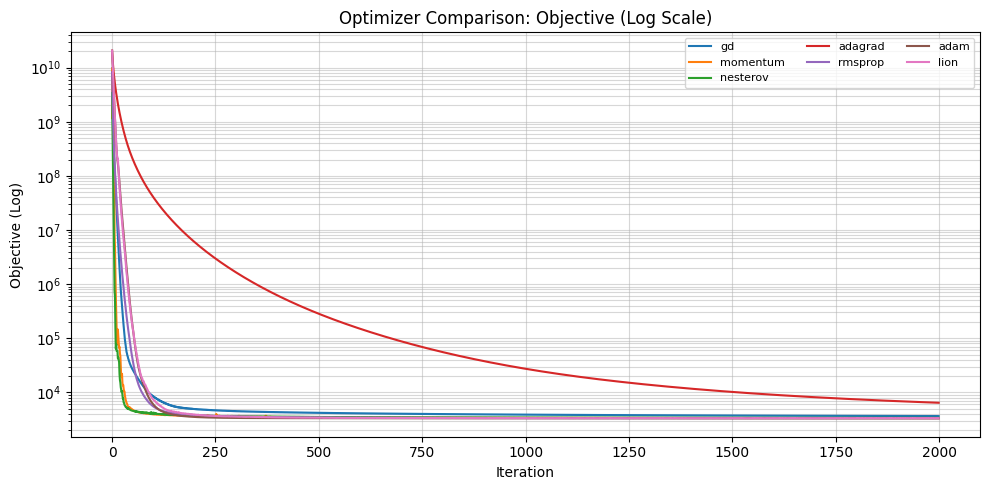

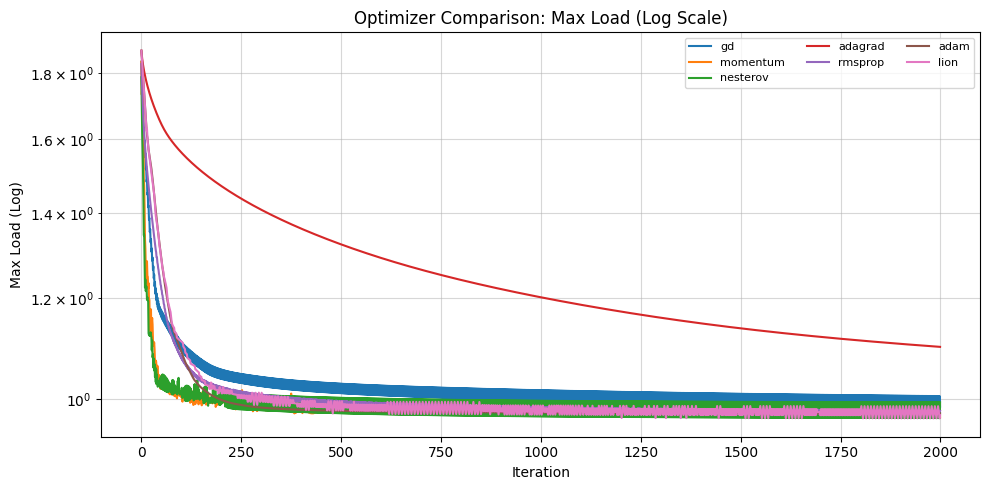

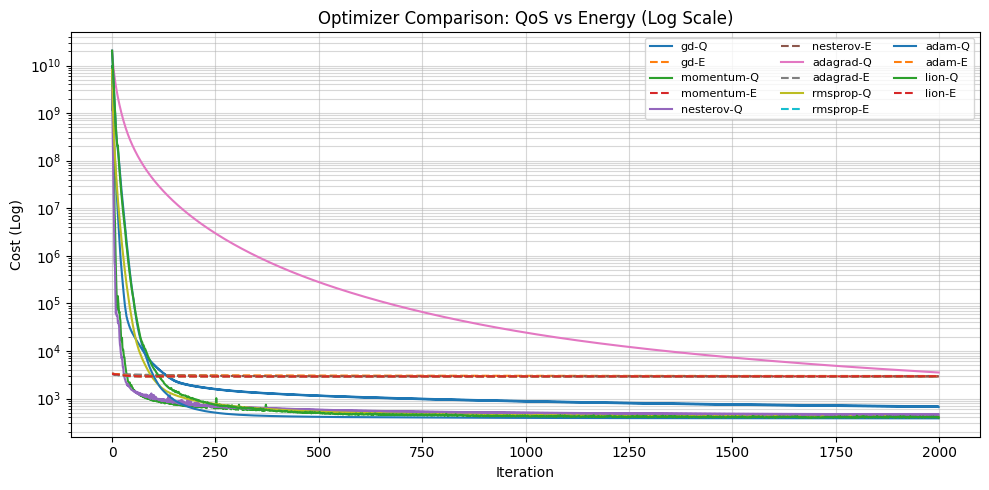

In [22]:
import time
# ============================================================
# 训练循环 (优化器执行核心逻辑)
# ============================================================

# 梯度裁剪函数：防止梯度爆炸
def _clip_grad(grad, clip_norm):
    if clip_norm is None:
        return grad
    norm = np.linalg.norm(grad)
    if norm == 0:
        return grad
    # 如果梯度范数超过阈值，则按比例缩放
    scale = min(1.0, clip_norm / norm)
    return grad * scale


# 通用优化器运行函数
# 支持多种算法：GD, Momentum, AdaGrad, RMSprop, Adam, Lion
def run_optimizer(
    optimizer_name,      # 优化器名称字符串
    x0,                  # 初始CIO值
    beta,                # Softmax分散度参数
    Q0, Alpha, L0,       # QoS成本参数
    C0_all,              # 能源成本系数
    Wq, We,              # 权重参数
    Rsrp, Conn, Capa,    # 网络环境矩阵
    ALL_Users_Traffic,   # 用户流量需求
    ALL_Cells_Bw,        # 小区带宽
    max_iteration=20000, # 最大迭代次数
    tolerance=1e-3,      # 参数收敛阈值
    tolerance_obj=1e-1,  # 目标函数收敛阈值
    tolerance_grad=1.0,  # 梯度收敛阈值
    lr=0.1,              # 学习率
    normalize_x=True,    # 是否每轮对CIO进行去均值归一化
    clip_grad_norm=None, # 梯度裁剪阈值 (None表示不裁剪)
    print_every=100,     # 打印日志频率
    optimizer_cfg=None,  # 优化器特定超参数 (如beta1, beta2)
    weight_decay=0.0,    # 权重衰减 (L2正则化)
    min_iteration=20,    # 最小迭代次数，防止过早停止
):
    if optimizer_cfg is None:
        optimizer_cfg = {}

    # 解析优化器名称，检查是否开启 Decoupled Weight Decay (如 AdamW)
    opt_name = optimizer_name.lower()
    decoupled_wd = optimizer_cfg.get("decoupled_wd", None)
    if opt_name.endswith("w"): # 例如 adamw, lionw
        base_opt = opt_name[:-1]
        if decoupled_wd is None:
            decoupled_wd = True
    else:
        base_opt = opt_name
        if decoupled_wd is None:
            decoupled_wd = False

    M = Rsrp.shape[0]
    N = Rsrp.shape[1]

    # 初始化状态变量
    x_t = x0.copy()
    v_t = np.zeros_like(x_t) # 一阶矩估计 / 速度
    G_t = np.zeros_like(x_t) # 二阶矩估计 / 累积梯度平方
    m_t = np.zeros_like(x_t) # 动量缓存 (Lion用)

    obj_pre = float("inf")
    start_time = time.time()

    # 初始化历史记录字典
    history = {
        "x_path": [],      # CIO轨迹
        "load": [],        # 负载轨迹
        "obj": [],         # 总目标函数值
        "obj_Q": [],       # QoS成本
        "obj_E": [],       # 能源成本
        "unit_cost": [],   # 单位成本
        "grad_norm": [],   # 梯度范数
        "net_capa": [],    # 网络容量
    }

    # --- 主迭代循环 ---
    for i in range(1, max_iteration + 1):
        
        # 1. 前向传播 (Forward): 计算当前Cost和状态
        obj, cache = forward(
            x_t,
            beta,
            Q0,
            Alpha,
            L0,
            C0_all,
            Wq,
            We,
            Rsrp,
            Conn,
            Capa,
            ALL_Users_Traffic,
            ALL_Cells_Bw,
        )

        # 估算网络总容量 (用于监控)
        net_capa = network_capa_estimate(
            cache["Prob"], Capa, Conn, ALL_Cells_Bw
        )

        # 2. 反向传播 (Backward): 计算梯度
        grad = backward(
            x_t, 
            cache,
            M,
            N,
            beta,
            Q0,
            Alpha,
            L0,
            C0_all,
            Wq,
            We,
            Conn,
            Capa,
            ALL_Users_Traffic,
            ALL_Cells_Bw,
        )

        # 3. 梯度预处理 (权重衰减 & 裁剪)
        wd = optimizer_cfg.get("weight_decay", weight_decay)
        grad_update = grad
        
        # 如果不是Decoupled WD，则将正则项加到梯度上 (L2正则)
        if wd and not decoupled_wd:
            grad_update = grad + wd * x_t
        
        grad_update = _clip_grad(grad_update, clip_grad_norm)

        # 4. 执行优化器更新步骤
        if base_opt == "gd":
            x_new = grad_step(x_t, grad_update, lr=lr)
        elif base_opt == "momentum":
            x_new, v_t = momentum_step(
                x_t, v_t, grad_update, lr=lr, beta=optimizer_cfg.get("beta", 0.9)
            )
        elif base_opt == "nesterov":
            x_new, v_t = nesterov_step(
                x_t, v_t, grad_update, lr=lr, beta=optimizer_cfg.get("beta", 0.9)
            )
        elif base_opt == "adagrad":
            x_new, G_t = adagrad_step(x_t, G_t, grad_update, lr=lr)
        elif base_opt == "rmsprop":
            x_new, G_t = rmsprop_step(
                x_t, G_t, grad_update, lr=lr, beta=optimizer_cfg.get("beta", 0.9)
            )
        elif base_opt == "adam":
            x_new, v_t, G_t = adam_step(
                x_t,
                v_t,
                G_t,
                grad_update,
                i,
                lr=lr,
                beta1=optimizer_cfg.get("beta1", 0.9),
                beta2=optimizer_cfg.get("beta2", 0.999),
            )
        elif base_opt == "lion":
            x_new, m_t = lion_step(
                x_t,
                m_t,
                grad_update,
                lr=lr,
                beta1=optimizer_cfg.get("beta1", 0.9),
                beta2=optimizer_cfg.get("beta2", 0.99),
            )
        else:
            raise ValueError(f"Unknown optimizer: {optimizer_name}")

        # 如果是Decoupled WD (如AdamW)，在更新参数后单独衰减权重
        if wd and decoupled_wd:
            x_new = x_new * (1 - lr * wd)

        # 5. CIO归一化 (可选)
        # 避免CIO整体漂移，保持相对值意义
        if normalize_x:
            x_new = x_new - np.mean(x_new)

        # 6. 计算统计量与收敛判断
        x_diff = np.linalg.norm(x_new - x_t)
        grad_norm = np.linalg.norm(grad_update)

        # 预计算下一轮的目标值 (用于判断收敛)
        obj_new, cache_new = forward(
            x_new,
            beta,
            Q0,
            Alpha,
            L0,
            C0_all,
            Wq,
            We,
            Rsrp,
            Conn,
            Capa,
            ALL_Users_Traffic,
            ALL_Cells_Bw,
        )
        net_capa_new = network_capa_estimate(
            cache_new["Prob"], Capa, Conn, ALL_Cells_Bw
        )

        # 收敛条件检查: 参数变化小 OR 目标值变化小 OR 梯度趋零
        # 增加 min_iteration 检查，防止过早停止
        should_stop = False
        if i > min_iteration:
            # 使用相对变化率可能更稳健，或者调小阈值
            obj_diff = abs(obj_pre - obj_new)
            if obj_pre > 1e-9:
                obj_rel_diff = obj_diff / abs(obj_pre)
            else:
                obj_rel_diff = obj_diff

            should_stop = (
                x_diff < tolerance
                or obj_diff < tolerance_obj
                or grad_norm < tolerance_grad
            )

        # 记录历史数据
        history["x_path"].append(x_new.copy())
        history["load"].append(cache_new["Load_m"])
        history["obj"].append(obj_new)
        history["obj_Q"].append(cache_new["QoS_Cost"])
        history["obj_E"].append(cache_new["Energy_Cost"])
        history["unit_cost"].append(cache_new["Unit_Cost"])
        history["grad_norm"].append(grad_norm)
        history["net_capa"].append(net_capa_new)

        # 打印日志
        if print_every and i % print_every == 0:
            end_time = time.time()
            print(
                f"[{optimizer_name}] Round {i} | "
                f"obj={obj_new:.4f}, max_load={np.max(cache_new['Load_m']):.4f}, "
                f"net_capa={net_capa_new:.4f}, x_diff={x_diff:.4f}, "
                f"grad_norm={grad_norm:.4f}, time={end_time - start_time:.4f}s"
            )
            start_time = time.time()

        # 更新状态
        x_t = x_new
        obj_pre = obj_new
        if should_stop:
            print(f"[{optimizer_name}] Converged at Round {i}")
            if i > min_iteration:
                 if x_diff < tolerance: print(f"  Reason: x_diff ({x_diff:.2e}) < tol")
                 if obj_diff < tolerance_obj: print(f"  Reason: obj_diff ({obj_diff:.2e}) < tol")
                 if grad_norm < tolerance_grad: print(f"  Reason: grad_norm ({grad_norm:.2e}) < tol")
            break

    history["x_final"] = x_t.copy()
    return history


# 经典运行模式 (适配原有代码结构)
def run_classic(
    x0,
    beta,
    Q0,
    Alpha,
    L0,
    C0_all,
    Wq,
    We,
    Rsrp,
    Conn,
    Capa,
    ALL_Users_Traffic,
    ALL_Cells_Bw,
    **kwargs,
):
    # 默认使用 Adam 优化器
    history = run_optimizer(
        "adam",
        x0,
        beta,
        Q0,
        Alpha,
        L0,
        C0_all,
        Wq,
        We,
        Rsrp,
        Conn,
        Capa,
        ALL_Users_Traffic,
        ALL_Cells_Bw,
        **kwargs,
    )

    # 将结果导出到全局变量，以便后续绘图代码使用
    globals()["gd_path"] = history["x_path"]
    globals()["gd_load"] = history["load"]
    globals()["gd_obj"] = history["obj"]
    globals()["gd_obj_Q"] = history["obj_Q"]
    globals()["gd_obj_E"] = history["obj_E"]
    globals()["gd_unit_cost"] = history["unit_cost"]
    globals()["gd_net_capa"] = history["net_capa"]

    return history


# ============================================================
# 消融实验与可视化模块 (对比不同优化器)
# ============================================================
def run_ablation(
    x0,
    beta,
    Q0,
    Alpha,
    L0,
    C0_all,
    Wq,
    We,
    Rsrp,
    Conn,
    Capa,
    ALL_Users_Traffic,
    ALL_Cells_Bw,
    optimizer_names=None,
    normalize_flags=None,
    weight_decay_flags=None,
    **kwargs,
):
    # 默认对比列表
    if optimizer_names is None:
        optimizer_names = [
            "gd", "momentum", "adagrad", "rmsprop", 
            "adam", "adamw", "lion", "lionw",
        ]
    if normalize_flags is None:
        normalize_flags = [True, False] # 对比是否归一化
    if weight_decay_flags is None:
        weight_decay_flags = [0.0, 1e-3] # 对比权重衰减

    results = {}
    for name in optimizer_names:
        for norm_flag in normalize_flags:
            for wd in weight_decay_flags:
                wd_tag = "wd" if wd > 0 else "no_wd"
                tag = f"{name}_{wd_tag}_norm" if norm_flag else f"{name}_{wd_tag}_no_norm"
                # 运行优化器并保存结果
                results[tag] = run_optimizer(
                    name,
                    x0,
                    beta,
                    Q0,
                    Alpha,
                    L0,
                    C0_all,
                    Wq,
                    We,
                    Rsrp,
                    Conn,
                    Capa,
                    ALL_Users_Traffic,
                    ALL_Cells_Bw,
                    normalize_x=norm_flag,
                    weight_decay=wd,
                    **kwargs,
                )
    return results


# 绘制目标函数收敛曲线对比
def plot_ablation_obj(results, title="Objective Comparison"):
    plt.figure(figsize=(10, 5))
    for name, hist in results.items():
        plt.plot(hist["obj"], label=name)
    plt.yscale('log') # 使用对数坐标轴
    plt.title(title + " (Log Scale)")
    plt.xlabel("Iteration")
    plt.ylabel("Objective (Log)")
    plt.grid(True, which="both", ls="-", alpha=0.5)
    plt.legend(ncol=3, fontsize=8)
    plt.tight_layout()
    # plt.show()


# 绘制最大负载收敛曲线对比
def plot_ablation_max_load(results, title="Max Load Comparison"):
    plt.figure(figsize=(10, 5))
    for name, hist in results.items():
        max_load = [np.max(l) for l in hist["load"]]
        plt.plot(max_load, label=name)
    # 负载通常在 0-1 之间，对数坐标可能不一定直观，但根据用户要求也加上
    plt.yscale('log')
    plt.title(title + " (Log Scale)")
    plt.xlabel("Iteration")
    plt.ylabel("Max Load (Log)")
    plt.grid(True, which="both", ls="-", alpha=0.5)
    plt.legend(ncol=3, fontsize=8)
    plt.tight_layout()
    # plt.show()


# 绘制QoS与能耗成本对比
def plot_ablation_qe(results, title="QoS / Energy Comparison"):
    plt.figure(figsize=(10, 5))
    for name, hist in results.items():
        plt.plot(hist["obj_Q"], label=f"{name}-Q")
        plt.plot(hist["obj_E"], linestyle="--", label=f"{name}-E")
    plt.yscale('log') # 使用对数坐标轴
    plt.title(title + " (Log Scale)")
    plt.xlabel("Iteration")
    plt.ylabel("Cost (Log)")
    plt.grid(True, which="both", ls="-", alpha=0.5)
    plt.legend(ncol=3, fontsize=8)
    plt.tight_layout()
    # plt.show()


# ==========================================
#         运行仿真 (Ablation Study)
# ==========================================

# 为了在 Jupyter Notebook 的一个单元格中运行，我们将日志类定义和优化过程放在一起
import time
import sys
import os
import datetime
import matplotlib.pyplot as plt
import numpy as np

# --- 1. 定义日志记录器 ---
class Logger(object):
    def __init__(self, filename='default.log'):
        self.terminal = sys.stdout
        self.log = open(filename, 'a', encoding='utf-8')

    def write(self, message):
        self.terminal.write(message)
        self.log.write(message)
        self.log.flush()

    def flush(self):
        self.terminal.flush()
        self.log.flush()

timestamp = datetime.datetime.now().strftime("%Y%m%d_%H%M%S")

OUTPUT_DIR = "ablation_results" + timestamp
if not os.path.exists(OUTPUT_DIR):
    os.makedirs(OUTPUT_DIR)
    
# 设置日志文件名 (带时间戳)
log_filename = os.path.join(OUTPUT_DIR, f"log_{timestamp}.txt")
# 重定向 stdout
sys.stdout = Logger(log_filename)

print(f"✅ Logging started. Output will be saved to {log_filename}")
import os

# --- 2. 设置仿真参数 ---
max_iteration = 2000  # 最大迭代次数
tolerance = 1e-6     # 策略收敛容忍度 (建议调小)
tolerance_obj = 1e-5   # 目标值收敛容忍度 (建议调小)
tolerance_grad = 1e-4    # 梯度值收敛容忍度 (建议调小)

#### 注意！！！！！！！！！！！！！！！！！！！！ 这是原参数！####
# max_iteration = 20000
# tolerance = 1e-3
# tolerance_obj = 1e-1   # 目标值收敛容忍度 (建议调小)
# tolerance_grad = 1    # 梯度值收敛容忍度 (建议调小)


print(f"✅ Simulation Start: Random seed = {random_seed}")

x_0 = np.zeros(M)


# --- 3. 定义要对比的优化器列表 (包含所有实现的优化器) ---
optimizers_to_test = ["gd", "momentum", "nesterov", "adagrad", "rmsprop", "adam", "lion"]
results = {}

print(f"\n🚀 Starting Ablation Study with: {optimizers_to_test}")

# --- 4. 依次运行每个优化器 ---
for opt in optimizers_to_test:
    print(f"\n{'='*30}\n--- Running Optimizer: {opt} ---\n{'='*30}")
    
    # 记录开始时间
    start_t = time.time()
    
    # 调用 run_optimizer (它会打印详细日志)
    hist = run_optimizer(
        opt,
        x_0,
        beta,
        Q0,
        Alpha,
        L0,
        C0_all,
        Wq,
        We,
        Rsrp,
        Conn,
        Capa,
        ALL_Users_Traffic,
        ALL_Cells_Bw,
        max_iteration=max_iteration,
        tolerance=tolerance,
        tolerance_obj=tolerance_obj,
        tolerance_grad=tolerance_grad,
        lr=0.1,
        clip_grad_norm=5.0, # 增加梯度裁剪，防止GD等算法发散
        print_every=200 # 每200轮打印一次
    )
    
    # 记录结束时间
    elapsed = time.time() - start_t
    print(f"✅ {opt} finished in {elapsed:.2f} seconds.")
    
    results[opt] = hist

print(f"\n✅ Ablation Study Completed. All logs saved to {log_filename}")


# --- 5. 保存对比图表 ---
# 绘制目标函数对比
plot_ablation_obj(results, title="Optimizer Comparison: Objective")
plt.savefig(os.path.join(OUTPUT_DIR, f"ablation_obj_{timestamp}.png"))
print(f"📊 Saved comparison plot: ablation_obj_{timestamp}.png")

# 绘制最大负载对比
plot_ablation_max_load(results, title="Optimizer Comparison: Max Load")
plt.savefig(os.path.join(OUTPUT_DIR, f"ablation_load_{timestamp}.png"))
print(f"📊 Saved comparison plot: ablation_load_{timestamp}.png")

# 绘制QoS/Energy对比
plot_ablation_qe(results, title="Optimizer Comparison: QoS vs Energy")
plt.savefig(os.path.join(OUTPUT_DIR, f"ablation_qe_{timestamp}.png"))
print(f"📊 Saved comparison plot: ablation_qe_{timestamp}.png")


# --- 6. 准备后续可视化数据 ---
# 选择一个表现较好的优化器结果 (例如 'adam' 或 'lion') 用于生成 GIF
# 这里默认选择 'adam'，因为它通常比较稳定
best_opt = "adam"
if best_opt not in results:
    best_opt = optimizers_to_test[0] # Fallback

print(f"\n👉 Selected '{best_opt}' for final detailed visualization (GIF generation).")
history = results[best_opt]

# 导出全局变量 (模拟 run_classic 的行为，确保兼容后续绘图代码)
globals()["gd_path"] = history["x_path"]
globals()["gd_load"] = history["load"]
globals()["gd_obj"] = history["obj"]
globals()["gd_obj_Q"] = history["obj_Q"]
globals()["gd_obj_E"] = history["obj_E"]
globals()["gd_unit_cost"] = history["unit_cost"]
globals()["gd_net_capa"] = history["net_capa"]

# 恢复变量供后续绘图代码使用
x_t = history["x_final"]
obj = history["obj"][-1]
net_capa = history["net_capa"][-1]
i = len(history["x_path"])

# 重新计算最终状态的缓存
obj_final, cache = forward(x_t, beta, Q0, Alpha, L0, C0_all, Wq, We, Rsrp, Conn, Capa, ALL_Users_Traffic, ALL_Cells_Bw)
obj_pre = obj


## 可视化（静态图）

小区与用户空间分布图

算法迭代图

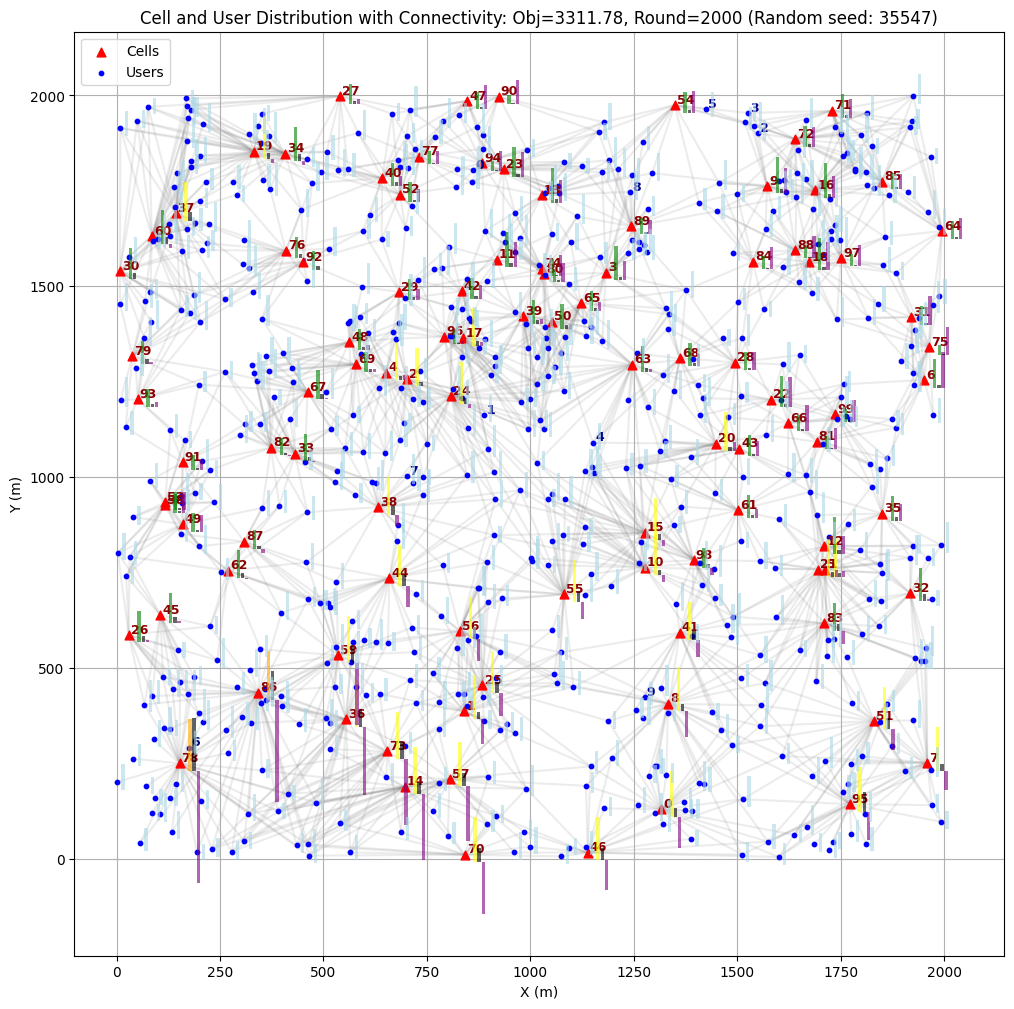

In [23]:
# 展示小区用户分布和负载、成本图（不要改动！！）


# --- (2) 小区与用户空间分布及连接关系 ---
plt.figure(figsize=(12, 12))
# 绘制连接线
for m in range(M):
    connected_users = np.where(Conn[m, :] == 1)[0]
    for n in connected_users:
        plt.plot([cell_pos[m, 0], user_pos[n, 0]],
                 [cell_pos[m, 1], user_pos[n, 1]],
                 color='gray', alpha=0.15, zorder=1)

plt.scatter(cell_pos[:, 0], cell_pos[:, 1], c='red', marker='^', s=40, label='Cells', zorder=2)
plt.scatter(user_pos[:, 0], user_pos[:, 1], c='blue', s=10, label='Users', zorder=2)

# 在小区旁边标注编号
for m in range(M):
    plt.text(cell_pos[m, 0] + 5,       # 向右偏移一点避免遮挡
             cell_pos[m, 1] + 5,       # 向上偏移一点
             f"{m}", color='darkred', fontsize=9, weight='bold')

# 在用户0-10旁边标注编号
for n in range(10):
    plt.text(user_pos[n, 0] + 5,       # 向右偏移一点避免遮挡
             user_pos[n, 1] + 5,       # 向上偏移一点
             f"{n}", color='darkblue', fontsize=9, weight='bold')

plt.title(f"Cell and User Distribution with Connectivity: Obj={obj:.2f}, Round={i} (Random seed: {random_seed})")
plt.xlabel("X (m)")
plt.ylabel("Y (m)")
plt.legend()
plt.grid(True)
# plt.tight_layout()


# --- 柱状图准备 ---
load_rects = []
cio_rects = []
cost_rects = []


bar_width = 4 * 2     # 柱子的宽度（更粗）
bar_max_height = 70 * 2   # 柱子的最大像素映射高度（控制视觉缩放）
offset_x = 10 * 2       # 柱子距离基站的水平间距
offset_y = 10 * 2       # 柱子竖直位置的间距



load_init = np.array(cache['Load_m'])
cio_init = np.array(x_t)
ucost_init = np.array(cache['Unit_Cost'])

cio_init = cio_init / 50
ucost_init = ucost_init / np.max(ucost_init)

# --- 绘制站点柱状图 ---
for m in range(M):
    x0 = cell_pos[m, 0] + offset_x
    y0 = cell_pos[m, 1]

    # 展示最后时刻T的数据
    L_height = load_init[m] * bar_max_height
    CIO_height = cio_init[m] * bar_max_height
    Cost_height = ucost_init[m] * bar_max_height

    if load_init[m] < 0.7:
        load_color = 'green'
    elif load_init[m] < 0.9:
        load_color = 'yellow'
    elif load_init[m] < 0.999:
        load_color = 'orange'
    else:
        load_color = 'red'

    # 带宽占用柱（绿色-黄色-橙色-红色）
    l_rect = plt.bar(x=x0 + 5, height=L_height, width=bar_width, bottom=y0 - offset_y, color=load_color, alpha=0.6, zorder=5)[0]
    cio_rect = plt.bar(x=x0 + 25, height=CIO_height, width=bar_width, bottom=y0 - offset_y, color="purple", alpha=0.6, zorder=5)[0]
    uc_rect = plt.bar(x=x0 + 15, height=Cost_height, width=bar_width, bottom=y0 - offset_y, color="black", alpha=0.6, zorder=5)[0]

    load_rects.append(l_rect)
    cio_rects.append(cio_rect)
    cost_rects.append(uc_rect)

# --- 绘制用户柱状图 ---
queue_rects = []

user_means = ALL_Users_Traffic

for n in range(N):
    x0 = user_pos[n, 0] + offset_x
    y0 = user_pos[n, 1]

    # 展示所有时刻T的平均数据
    Q_height = user_means[n] / 10 * bar_max_height

    # 平均队列柱（蓝色）
    q_rect = plt.bar(x=x0 - 5, height=Q_height, width=bar_width, bottom=y0 - offset_y, color='lightblue', alpha=0.6, zorder=5)[0]

    queue_rects.append(q_rect)

plt.show()

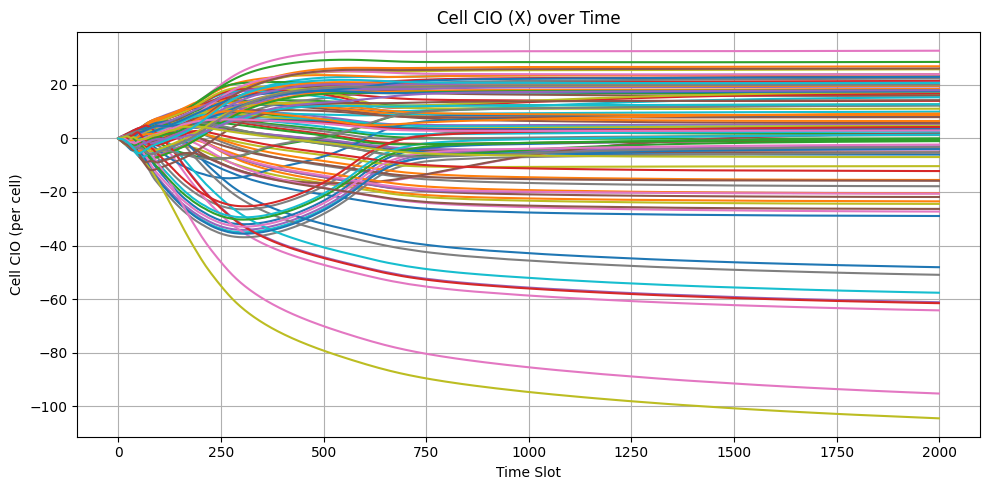

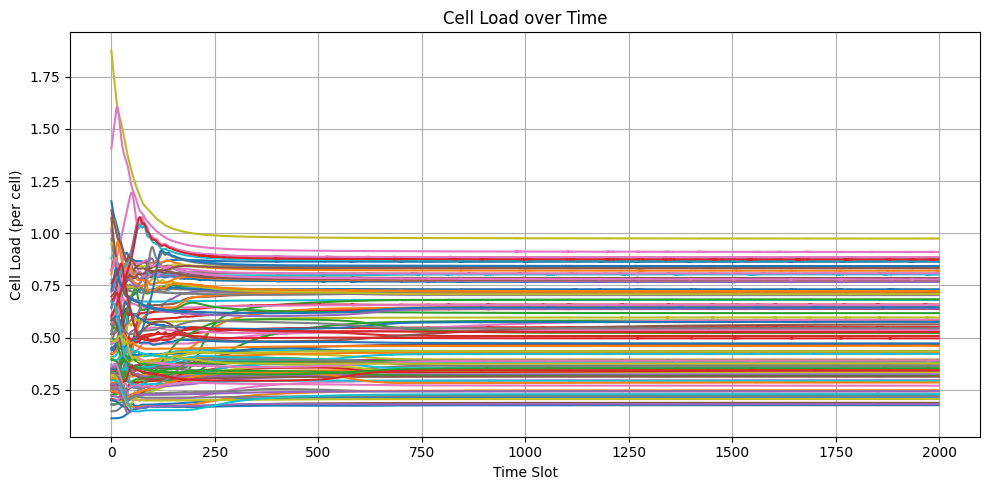

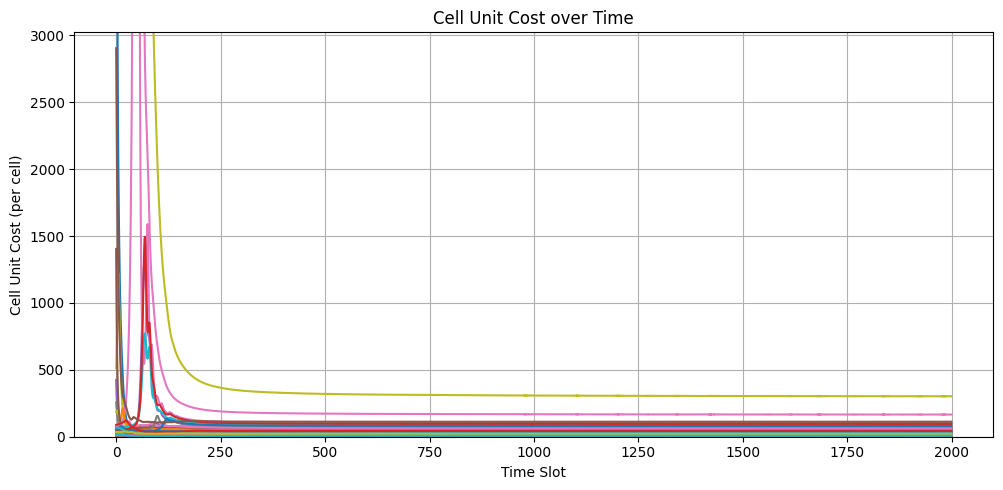

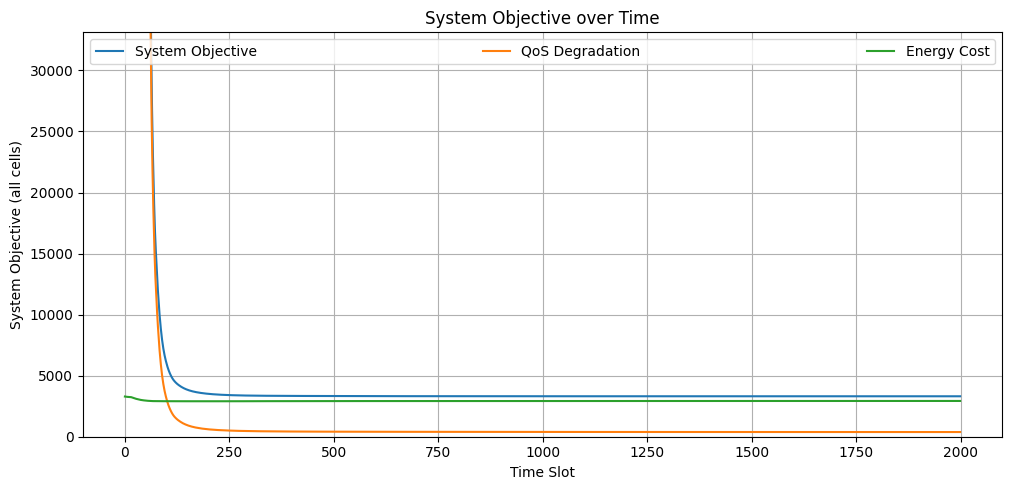

In [24]:
# 暂时小区策略、负载、单位成本、成本随时间变化趋势图（不要改动）


# --- (1a) 每个小区CIO vs 时间 ---
plt.figure(figsize=(10, 5))
for m in range(M):
    plt.plot(np.array(gd_path)[:,m], label=f"Cell {m}")
plt.title("Cell CIO (X) over Time")
plt.xlabel("Time Slot")
plt.ylabel("Cell CIO (per cell)")
plt.grid(True)
plt.tight_layout()
# plt.legend(ncol=6, mode='expand', loc='upper center')
plt.show()

# --- (1b) 每个小区Load vs 时间 ---
plt.figure(figsize=(10, 5))
for m in range(M):
    plt.plot(np.array(gd_load)[:,m], label=f"Cell {m}")
plt.title("Cell Load over Time")
plt.xlabel("Time Slot")
plt.ylabel("Cell Load (per cell)")
plt.grid(True)
plt.tight_layout()
# plt.legend(ncol=6, mode='expand', loc='upper center')
plt.show()

# --- (1b) 每个小区单位成本 vs 时间 ---
plt.figure(figsize=(10, 5))
for m in range(M):
    plt.plot(np.array(gd_unit_cost)[:,m], label=f"Cell {m}")
plt.title("Cell Unit Cost over Time")
plt.xlabel("Time Slot")
plt.ylabel("Cell Unit Cost (per cell)")
plt.grid(True)
plt.tight_layout()
# plt.legend(ncol=6, mode='expand', loc='upper center')
tmp_y = 10 * np.max(np.array(gd_unit_cost)[-1,:])
plt.ylim(0, tmp_y)  # 设置y轴范围
plt.show()



# --- (1c) 所有小区目标函数值obj vs 时间 ---
plt.figure(figsize=(10, 5))
plt.plot(np.array(gd_obj), label=f"System Objective")
plt.plot(np.array(gd_obj_Q), label=f"QoS Degradation")
plt.plot(np.array(gd_obj_E), label=f"Energy Cost")
plt.title("System Objective over Time")
plt.xlabel("Time Slot")
plt.ylabel("System Objective (all cells)")
plt.grid(True)
plt.tight_layout()
plt.legend(ncol=6, mode='expand', loc='upper center')
tmp_y = 10 * np.min(gd_obj)
plt.ylim(0, tmp_y)  # 设置y轴范围
plt.show()




## 保存动图视频

保存至Colab临时文件夹（关闭即删除）


In [25]:
!conda install -y -c conda-forge ffmpeg


In [26]:
# 保存动画视频，速度慢（调试的时候可禁止本代码，调试完跑最终仿真的时候再输出视频，需下载保存）


from datetime import datetime
import matplotlib.animation as animation

T = len(gd_load)

# --- (1a) 小区与用户空间分布及连接关系 ---
plt.figure(figsize=(12, 12))
# 绘制连接线
for m in range(M):
    connected_users = np.where(Conn[m, :] == 1)[0]
    for n in connected_users:
        plt.plot([cell_pos[m, 0], user_pos[n, 0]],
                 [cell_pos[m, 1], user_pos[n, 1]],
                 color='gray', alpha=0.15, zorder=1)

plt.scatter(cell_pos[:, 0], cell_pos[:, 1], c='red', marker='^', s=40, label='Cells', zorder=2)
plt.scatter(user_pos[:, 0], user_pos[:, 1], c='blue', s=10, label='Users', zorder=2)


# 在小区旁边标注编号
for m in range(M):
    plt.text(cell_pos[m, 0] + 5,
             cell_pos[m, 1] + 5,
             f"{m}", color='darkred', fontsize=9, weight='bold')

# 在用户0-10旁边标注编号
for n in range(10):
    plt.text(user_pos[n, 0] + 5,       # 向右偏移一点避免遮挡
             user_pos[n, 1] + 5,       # 向上偏移一点
             f"{n}", color='darkblue', fontsize=9, weight='bold')


plt.title(f"Cell and User Connectivity with Dynamic Load and CIO: Obj={obj:.2f}, Round={i} (Random seed: {random_seed})")
plt.xlabel("X (m)")
plt.ylabel("Y (m)")
plt.legend()
plt.grid(True)


# --- (1b) 动态柱状图准备 ---
load_rects = []
cio_rects = []
cost_rects = []

bar_width = 4 *2    # 柱子的宽度
bar_max_height = 70 *2   # 高度比例因子
offset_x = 10 *2       # 柱子水平偏移
offset_y = 10 *2       # 柱子底部偏移


cio_max = 50
ucost_max = np.max(np.abs(gd_unit_cost))

load_init = np.array(gd_load)[0, :]
cio_init = np.array(gd_path)[0, :]
ucost_init = np.array(gd_unit_cost)[0, :]

cio_init = cio_init / cio_max
ucost_init = ucost_init / ucost_max


for m in range(M):
    x0 = cell_pos[m, 0] + offset_x
    y0 = cell_pos[m, 1]

    # 初始时刻（t=0）
    L_height = load_init[m] * bar_max_height
    CIO_height = cio_init[m] * bar_max_height
    Cost_height = ucost_init[m] * bar_max_height
    if load_init[m] < 0.7:
        load_color = 'green'
    elif load_init[m] < 0.9:
        load_color = 'yellow'
    elif load_init[m] < 0.999:
        load_color = 'orange'
    else:
        load_color = 'red'

    # 带宽占用柱（绿色-黄色-橙色-红色）
    l_rect = plt.bar(x=x0 + 5, height=L_height, width=bar_width, bottom=y0 - offset_y, color=load_color, alpha=0.6, zorder=5)[0]
    cio_rect = plt.bar(x=x0 + 25, height=CIO_height, width=bar_width, bottom=y0 - offset_y, color="purple", alpha=0.6, zorder=5)[0]
    uc_rect = plt.bar(x=x0 + 15, height=Cost_height, width=bar_width, bottom=y0 - offset_y, color="black", alpha=0.6, zorder=5)[0]

    load_rects.append(l_rect)
    cio_rects.append(cio_rect)
    cost_rects.append(uc_rect)

# 时间标签
time_txt = plt.text(0.02, 0.96, '', transform=plt.gca().transAxes, fontsize=12, color='black', weight='bold')

# --- (2) 动态更新函数 ---
def update(t):
    obj_init = np.array(gd_obj)[t]
    obj_Q_init = np.array(gd_obj_Q)[t]
    obj_E_init = np.array(gd_obj_E)[t]

    load_init = np.array(gd_load)[t, :]
    cio_init = np.array(gd_path)[t, :]
    ucost_init = np.array(gd_unit_cost)[t, :]

    cio_init = cio_init / cio_max
    ucost_init = ucost_init / ucost_max

    for m in range(M):
        # 平均队列动态高度
        L_height = load_init[m] * bar_max_height
        CIO_height = cio_init[m] * bar_max_height
        Cost_height = ucost_init[m] * bar_max_height
        if load_init[m] < 0.7:
            load_color = 'green'
        elif load_init[m] < 0.9:
            load_color = 'yellow'
        elif load_init[m] < 0.999:
            load_color = 'orange'
        else:
            load_color = 'red'

        load_rects[m].set_height(L_height)
        load_rects[m].set_color(load_color)

        cio_rects[m].set_height(CIO_height)
        cost_rects[m].set_height(Cost_height)

    time_txt.set_text(f"Round = {t}, Obj = {obj_init:.2f} (QoS Degrade: {obj_Q_init:.2f} Energy: {obj_E_init:.2f})")
    return load_rects + [time_txt]


# --- (3) 创建动画并保存为 MP4 ---
ani = animation.FuncAnimation(plt.gcf(), update, frames = range(0, T, 50), interval=150, blit=True, repeat=True)

# 获取当前时间（格式示例：2025-12-05_15-48-30）
time_str = datetime.now().strftime("%Y%m%d_%H%M%S")

# 构造文件名
filename = f"cell_CIO_opt_{time_str}.mp4"

# 保存动画
ani.save(OUTPUT_DIR + '/' + filename, fps=10, dpi=120, writer='ffmpeg')

plt.close()
print(f"✅ 动态MP4视频已保存：{filename}")




# ▶ 方案B：基于xxxx的AI网络优化算法设计

目标：最小化小区的QoS下降和能源成本

决策变量：通过优化小区CIO，实现负载均衡或优化调度。



